<a href="https://colab.research.google.com/github/RedLinen/2021_ENCM369/blob/master/Copy_of_lab1_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1: Binary image classifier

## 1. Setup
Install fastbook and setup Google drive connection.

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 189 kB 43.0 MB/s 
     |████████████████████████████████| 1.2 MB 38.2 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 224 kB/s 
Mounted at /content/gdrive


Import necessary libraries

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

## 2. Download images 
Use Azure image search or DuckDuckGo to download 150 images of each class. Save images to Google drive.

In [ ]:
key = "3ba2593b5dbd45659faf5a0005c30781"

In [ ]:

gladius_results = search_images_bing(key, 'gladius')
long_sword_results = search_images_bing(key,'long sword')
gladius_ims = gladius_results.attrgot('thumbnailUrl')
long_sword_ims = long_sword_results.attrgot('thumbnailUrl')

len(gladius_ims)

150

In [ ]:
len(long_sword_ims)

150

### 2.1 Try it out
Similar to the lecture notebook, try out your query and plot a few of the resulting images to verify that your search returns sensible images.

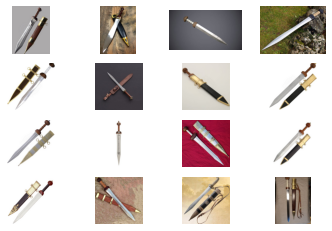

In [ ]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(4,4)
for i in range(4):
  for j in range(4):
    image_data = requests.get(gladius_ims[i+4*j])
    image_data.raise_for_status()
    image = Image.open(BytesIO(image_data.content))
    axes[i][j].imshow(image)
    axes[i][j].imshow(image)
    axes[i][j].axis("off")
plt.show()


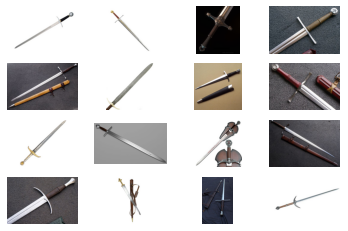

In [ ]:
f, axes = plt.subplots(4,4)
for i in range(4):
  for j in range(4):
    image_data = requests.get(long_sword_ims[i+4*j])
    image_data.raise_for_status()
    image = Image.open(BytesIO(image_data.content))
    axes[i][j].imshow(image)
    axes[i][j].imshow(image)
    axes[i][j].axis("off")
plt.show()

### 2.2 Get images for the two classes
Download 150 images of each class. Save images to Google drive.  
Remove any corrupt images using `verify_images()`.

In [ ]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()

(#3) [Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of lab1-binary-classifier.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword')]

In [ ]:
sword_types = 'gladius','longsword'

In [ ]:
for o in sword_types:
  dest = (export_path/o)
  dest.mkdir(exist_ok=True)
  results = search_images_bing(key, f'{o}')
  download_images(dest, urls=results.attrgot('thumbnailUrl'))

In [ ]:
fns = get_image_files(export_path)
fns

(#293) [Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000008.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000002.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000010.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000009.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000003.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000004.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000007.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000006.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000011.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000005.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 33434
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 33437
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6 bytes but only got 0. Skipping tag 36864
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 0. Skipping tag 36867
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes

(#2) [Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000134.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000149.jpg')]

In [ ]:
failed.map(Path.unlink);

FileNotFoundError: ignored

In [ ]:
(export_path/'longsword').ls()

(#143) [Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000003.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000004.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000005.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000001.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000002.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000007.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000000.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000009.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000008.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/longsword/00000006.jpg')...]

In [ ]:
(export_path/'gladius').ls()

(#148) [Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000008.jpeg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000002.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000010.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000009.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000003.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000004.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000007.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000006.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000011.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/gladius/00000005.jpg')...]

## 3. Setup image loaders
Setup image loaders, use 20% of images for validation, and show one batch for each training and validation dataset.

**Question 1:** How many images of each class are in trainging and validation sets?

*YOUR ANSWER HERE*

## 4. Setup cnn learner
Setup a cnn learner with the dataloaders, `resnet18` architecture and `error_rate` as metric.

## 5. Train binary classifier
Fine tune for 10 epochs and show results.

**Question 2:** Is the model overfitting? Why, why not?

*YOUR ANSWER HERE*

## 6. Analyze results

Plot confusion matrix.

Plot top 5 losses.


**Question 3:** How many false positive, false negative errors?

*YOUR ANSWER HERE*

## 7. Summary and Conclusion

Summarize:
- Type of classifier trained.
- Number of images of each class in the training validation sets
- Error rate achieved

*YOUR ANSWER HERE*

Conclusion:
- Are there any problems with data/labeling?
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


## 8. Reflection
Include a sentence or two about 
- what you liked or disliked, 
- found interesting, confusing, challangeing, motivating 

while working on this assignment.

*YOUR ANSWER HERE*